<a href="https://colab.research.google.com/github/VictoriaCar/BA820---College-Scorecard-/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizing Unsupervised ML Techniques on College Scorecard Data to Evaluate Best Value for Money - BA820 A1 Team 7 - Part 2

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Cleaning

### Load and Inspect Data

In [26]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/BA820 Project/MERGED2022_23_PP.csv")
# df = pd.read_csv("MERGED2022_23_PP.csv")

<ipython-input-26-31a2283f9ea8>:3: DtypeWarning: Columns (9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/BA820 Project/MERGED2022_23_PP.csv")


In [27]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE0_P11,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.shape

(6484, 3305)

**Analysis**

When loading and inspecting the data for the first time, it was clear that we would have to significantly reduce the total number of columns from the initial 3,305. While we intended to employ dimensionality reduction techniques, we knew it would be in our best interest to first try to reduce the number of columns using simple techniques to eliminate objectively incomplete and non-informative features.

Given the context of this project, our initial intention was to keep all rows representing individual colleges and provide a truly comprehensive rating of all US colleges.



### Drop Columns at Different "Null Thresholds"

In [29]:
# If a column has more than 50% missing values --> drop it
missing_values = df.isnull().sum() / len(df) * 100
cols_missing = missing_values[missing_values > 50]
dropped_df = df.drop(columns = cols_missing.index)

print(f"Columns dropped: {len(cols_missing)}")
print(f"New DataFrame shape: {dropped_df.shape}")

Columns dropped: 2355
New DataFrame shape: (6484, 950)


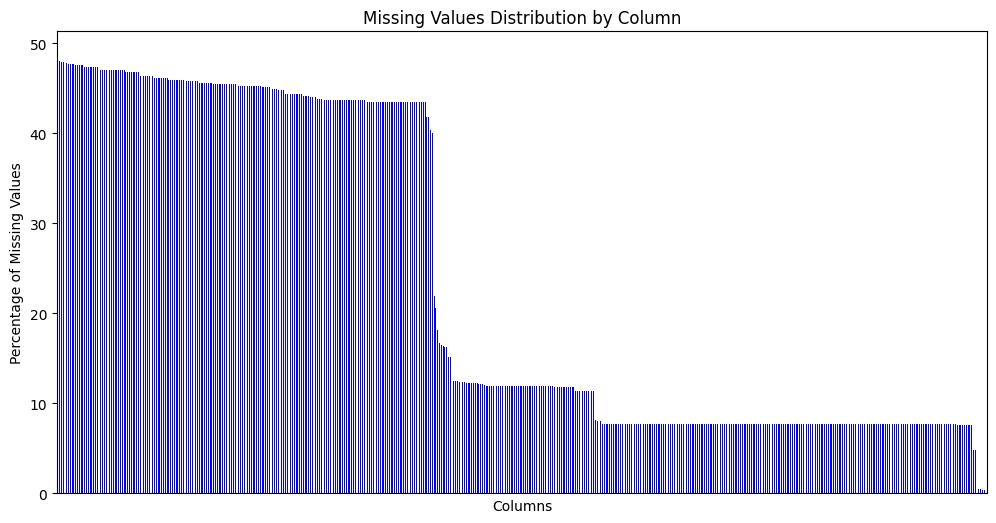

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# To visualize new distribution of missing values of our data
missing_values = dropped_df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing_values.plot(kind="bar", color="blue")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values Distribution by Column")
plt.xticks([])
plt.show()


By looking at the plot we see that we could probably drop all of the columns that have 40-50% missing values. After removing those, the missing value percentage of the columns left drop drastically to around 10%.

In [31]:
# If a column has more than 10% missing values --> drop it
missing_values_updates = dropped_df.isnull().sum() / len(dropped_df) * 100
cols_missing_updates = missing_values_updates[missing_values_updates > 10]
dropped2_df = dropped_df.drop(columns = cols_missing_updates.index)

print(f"Columns dropped: {len(cols_missing_updates)}")
print(f"New DataFrame shape: {dropped2_df.shape}")

Columns dropped: 300
New DataFrame shape: (6484, 650)


In [32]:
dropped2_df.isnull().sum()

,0
UNITID,0
OPEID,26
OPEID6,26
INSTNM,0
CITY,0
...,...
BBRR4_PP_NOMALE_MAKEPROG,0
BBRR4_PP_NOMALE_PAIDINFULL,0
BBRR4_PP_NOMALE_DISCHARGE,0
CONTROL_PEPS,30


**Analysis**

As a starting point, we dropped all columns of greater than 50% nulls. Using the 50% threshold, we dropped 2,355 columns, leaving us with 950. While some of these features may have presented valuable information, having to impute over 50% would materially dilute its accuracy. Additionally, given the large number of features in the data, removing these null-heavy columns would likely not undermine any underlying patterns in the data.

After dropping columns at the 50% threshold, we plotted the percentage of nulls in the remaining columns and saw that there were distinct “cliffs” at around 45% and 10%. With that, we realized that dropping all columns greater than 10% null values was acceptable as we believed imputing at or less than 648 of 6,484 would not materially compromise the data accuracy. Using this new threshold resulted in 300 columns being dropped and 650 remaining columns.


In [33]:
#from sklearn.feature_selection import VarianceThreshold

#dropped3_df = dropped2_df.copy()

#df_numeric = dropped3_df.select_dtypes(include=[np.number])

#selector = VarianceThreshold(threshold=0.01)
#df_numeric_reduced = df_numeric[df_numeric.columns[selector.fit(df_numeric).get_support()]]

#dropped3_df = dropped3_df.drop(columns=dropped3_df.columns).join(df_numeric_reduced)

In [34]:
#print(f"New DataFrame shape: {dropped3_df.shape}")


#print(dropped3_df.columns.tolist())


### Feature Selection using Qualitative Criteria from ChatGPT

In [35]:
selected_columns = [
    # Institutional Characteristics
    'CONTROL',  # Type of institution control: Public (1), Private nonprofit (2), Private for-profit (3)
    'REGION',  # Geographic region of the institution (e.g., New England, Midwest, etc.)
    'LOCALE',  # Degree of urbanization: City, Suburb, Town, Rural classification
    'CCBASIC',  # Carnegie Classification of the institution's basic category
    'CCUGPROF',  # Carnegie Classification of undergraduate instructional program
    'CCSIZSET',  # Carnegie Classification based on institution size and setting

    # Academic Offerings
    'PREDDEG',  # Predominant degree awarded (Associate's, Bachelor's, etc.)
    'HIGHDEG',  # Highest degree awarded at the institution

    # Financial Information
    'TUITFTE',  # Tuition and fees per full-time equivalent student
    'INEXPFTE',  # Instructional expenses per full-time equivalent student

    # Student Outcomes - Loan Repayment and Default Rates (1-Year Follow-Up)
    'BBRR1_FED_UG_N',  # Number of undergraduate borrowers in federal loan cohort
    'BBRR1_FED_UG_DFLT',  # Number of undergraduate borrowers who defaulted on their loans
    'BBRR1_FED_UG_DLNQ',  # Number of undergraduate borrowers delinquent on their loans
    'BBRR1_FED_UG_FBR',  # Number of undergraduate borrowers in forbearance
    'BBRR1_FED_UG_DFR',  # Number of undergraduate borrowers in deferment
    'BBRR1_FED_UG_NOPROG',  # Number of undergraduate borrowers not making progress on repayment
    'BBRR1_FED_UG_MAKEPROG',  # Number of undergraduate borrowers making progress on repayment
    'BBRR1_FED_UG_PAIDINFULL',  # Number of undergraduate borrowers who paid loans in full
    'BBRR1_FED_UG_DISCHARGE',  # Number of undergraduate borrowers whose loans were discharged

    # Student Outcomes - Loan Repayment and Default Rates (4-Year Follow-Up)
    'BBRR4_FED_UG_N',  # Number of undergraduate borrowers in federal loan cohort (4 years later)
    'BBRR4_FED_UG_DFLT',  # Number of undergraduate borrowers who defaulted on their loans (4 years later)
    'BBRR4_FED_UG_DLNQ',  # Number of undergraduate borrowers delinquent on their loans (4 years later)
    'BBRR4_FED_UG_FBR',  # Number of undergraduate borrowers in forbearance (4 years later)
    'BBRR4_FED_UG_DFR',  # Number of undergraduate borrowers in deferment (4 years later)
    'BBRR4_FED_UG_NOPROG',  # Number of undergraduate borrowers not making progress on repayment (4 years later)
    'BBRR4_FED_UG_MAKEPROG',  # Number of undergraduate borrowers making progress on repayment (4 years later)
    'BBRR4_FED_UG_PAIDINFULL',  # Number of undergraduate borrowers who paid loans in full (4 years later)
    'BBRR4_FED_UG_DISCHARGE',  # Number of undergraduate borrowers whose loans were discharged (4 years later)

    # Diversity & Inclusivity - Minority-Serving Institutions
    #'HBCU',  # Historically Black Colleges and Universities (1 = Yes, 0 = No)
    #'PBI',  # Predominantly Black Institutions (1 = Yes, 0 = No)
    #'ANNHI',  # Alaska Native and Native Hawaiian-Serving Institutions (1 = Yes, 0 = No)
    #'TRIBAL',  # Tribal Colleges and Universities (1 = Yes, 0 = No)
    #'AANAPII',  # Asian American and Native American Pacific Islander-Serving Institutions (1 = Yes, 0 = No)
    #'HSI',  # Hispanic-Serving Institutions (1 = Yes, 0 = No)
    #'NANTI',  # Native American-Serving Non-Tribal Institutions (1 = Yes, 0 = No)

    # Gender-Based Institution Classification
    #'MENONLY',  # Whether the institution only enrolls men (1 = Yes, 0 = No)
    #'WOMENONLY'  # Whether the institution only enrolls women (1 = Yes, 0 = No)
]



filtered_df = dropped2_df[selected_columns]

print(filtered_df.columns.tolist())
print(f"New DataFrame shape: {filtered_df.shape}")


['CONTROL', 'REGION', 'LOCALE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'PREDDEG', 'HIGHDEG', 'TUITFTE', 'INEXPFTE', 'BBRR1_FED_UG_N', 'BBRR1_FED_UG_DFLT', 'BBRR1_FED_UG_DLNQ', 'BBRR1_FED_UG_FBR', 'BBRR1_FED_UG_DFR', 'BBRR1_FED_UG_NOPROG', 'BBRR1_FED_UG_MAKEPROG', 'BBRR1_FED_UG_PAIDINFULL', 'BBRR1_FED_UG_DISCHARGE', 'BBRR4_FED_UG_N', 'BBRR4_FED_UG_DFLT', 'BBRR4_FED_UG_DLNQ', 'BBRR4_FED_UG_FBR', 'BBRR4_FED_UG_DFR', 'BBRR4_FED_UG_NOPROG', 'BBRR4_FED_UG_MAKEPROG', 'BBRR4_FED_UG_PAIDINFULL', 'BBRR4_FED_UG_DISCHARGE']
New DataFrame shape: (6484, 28)


**Analysis**

Having exhausted our ability to drop columns using null thresholds pragmatically, we needed to find a way to narrow the column count even further. Since there were still 650 remaining, we knew we would have to reduce the number of features using qualitative reasoning. However, having the team comb through all 650 columns to judge what columns to keep and drop would be time-consuming and introduce human error. To remedy this, we fed the 650-column Data Frame and data dictionary into ChatGPT and then asked which columns would be most important to keep to produce a reliable clustering output. This resulted in the 28 features in the selected columns list that would become the final list of columns for the Unsupervised ML process.

*ChatGPT promt used to select Columns*

https://chatgpt.com/c/67b1fc08-f6ec-800a-a423-aa1a9c4a5863

### Simple Imputation of Nulls

In [36]:
filtered_df.isnull().sum()

,0
CONTROL,0
REGION,0
LOCALE,495
CCBASIC,495
CCUGPROF,495
CCSIZSET,495
PREDDEG,0
HIGHDEG,0
TUITFTE,524
INEXPFTE,524


In [37]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['LOCALE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'TUITFTE', 'INEXPFTE']
imputer = SimpleImputer(strategy="mean")
filtered_df[columns_to_impute] = imputer.fit_transform(filtered_df[columns_to_impute])

filtered_df.isnull().sum()


<ipython-input-37-b470e9262638>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[columns_to_impute] = imputer.fit_transform(filtered_df[columns_to_impute])


,0
CONTROL,0
REGION,0
LOCALE,0
CCBASIC,0
CCUGPROF,0
CCSIZSET,0
PREDDEG,0
HIGHDEG,0
TUITFTE,0
INEXPFTE,0


In [38]:
filtered_df.shape

(6484, 28)

In [39]:
filtered_df.head()

,CONTROL,REGION,LOCALE,CCBASIC,CCUGPROF,CCSIZSET,PREDDEG,HIGHDEG,TUITFTE,INEXPFTE,...,BBRR1_FED_UG_DISCHARGE,BBRR4_FED_UG_N,BBRR4_FED_UG_DFLT,BBRR4_FED_UG_DLNQ,BBRR4_FED_UG_FBR,BBRR4_FED_UG_DFR,BBRR4_FED_UG_NOPROG,BBRR4_FED_UG_MAKEPROG,BBRR4_FED_UG_PAIDINFULL,BBRR4_FED_UG_DISCHARGE
0,1,5,12.0,18.0,10.0,14.0,3,4,10673.0,7073.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
1,1,5,12.0,15.0,9.0,15.0,3,4,11549.0,15256.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
2,2,5,12.0,20.0,5.0,6.0,3,4,16987.0,5927.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
3,1,5,12.0,15.0,15.0,13.0,3,4,9212.0,8733.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
4,1,5,12.0,17.0,10.0,14.0,3,4,9246.0,9349.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS


In [41]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CONTROL                  6484 non-null   int64  
 1   REGION                   6484 non-null   int64  
 2   LOCALE                   6484 non-null   float64
 3   CCBASIC                  6484 non-null   float64
 4   CCUGPROF                 6484 non-null   float64
 5   CCSIZSET                 6484 non-null   float64
 6   PREDDEG                  6484 non-null   int64  
 7   HIGHDEG                  6484 non-null   int64  
 8   TUITFTE                  6484 non-null   float64
 9   INEXPFTE                 6484 non-null   float64
 10  BBRR1_FED_UG_N           6484 non-null   object 
 11  BBRR1_FED_UG_DFLT        6484 non-null   object 
 12  BBRR1_FED_UG_DLNQ        6484 non-null   object 
 13  BBRR1_FED_UG_FBR         6484 non-null   object 
 14  BBRR1_FED_UG_DFR        

**Analysis**

When inspecting the remaining columns, we found only five had null values, with the highest count being 524/6,484 or ~8%. We then used Simple Imputer and column mean to fill in the missing values for our imputation strategy. Following this imputation, the Data Frame had zero null values and a final shape of 6,484 rows and 28 columns.   

# **Analysis Plan**

The data preparation phase of the project uncovered a more granular insight into the team's data. The team had far too many features (over 5000) and was able to reduce them to under 100, as explained above. Additionally, the team imputed null values as we saw fit (columns with <10% nulls). Finally, the team utilized VarianceThreshold to drop any additional features with a variance <0.01. The team then conducted an in-depth EDA phase to explore how the dataset's features interact and to understand how the data is shaped.

The next step is to perform a detailed analysis of the data, through clustering techniques and dimensionality reduction, with the goal of developing an optimized model to identify colleges that provide the best value for money.

For clustering, the team will now compare K-Means and Hierarchical Clustering and evaluate the performance of the methods using the Silhouette Score to measure cluster cohesion and separation. Dendrogram Analysis will also visualize how clusters merge at different distances. Since the team does not know the optimal number of clusters, they will use the Elbow Method to analyze inertia for different values of k. Additionally, the team will experiment with different linkage methods in hierarchical clustering, including MIN, MAX, and Ward’s Method, to determine the most effective clustering structure. Since K-Means performance depends on initialization, the team will test different initialization techniques to improve clustering quality. The team will implement K-Means++, which aims to improve the quality of the clustering through smarter initializations¹. Additionally, the team will explore the Maxim (Furthest Point Heuristic) Initialization, which has been shown to reduce erroneous clusters from 15% to 6% if there is a need after experimenting with K-Means++².

The team will then move on to the dimensionality reduction stage, utilizing PCA, t-SNE, and UMAP as the primary methods. Since the team discovered the data shape as non-linear, they will primarily focus on t-SNE and UMAP, as PCA is better suited for linear data³. t-SNE is effective at preserving local relationships within the data and has been widely used in high-dimensional clustering applications⁴. However, it does not maintain global structures as well as UMAP, which offers superior computational efficiency and scalability for large datasets⁵. By applying these techniques, the team aims to visualize the data structure and improve clustering results by reducing noise from redundant features.

-------------------------------------------------------------------------------

<small> ¹ GeeksforGeeks. ML | KMEANS++ Algorithm. March 21, 2024. https://www.geeksforgeeks.org/ml-k-means-algorithm/.

<small> ² Fränti, P., & Ieranoja, S. “How Much Can K-Means Be Improved by Using Better Initialization and Repeats?” Pattern Recognition 93 (2019): 95–112. https://www.sciencedirect.com/science/article/pii/S0031320319301608.

<small> ³ Jolliffe, Ian T., and Jorge Cadima. "Principal Component Analysis: A Review and Recent Developments." Philosophical Transactions of the Royal Society A 374, no. 2065 (2016): 20150202. https://doi.org/10.1098/rsta.2015.0202.

<small> ⁴ van der Maaten, Laurens, and Geoffrey Hinton. “Visualizing Data Using t-SNE.” Journal of Machine Learning Research 9 (2008): 2579–2605. https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf.

<small> ⁵ McInnes, Leland, John Healy, and James Melville. "UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction." arXiv preprint arXiv:1802.03426 (2018). https://arxiv.org/abs/1802.03426.
